In [ ]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom as dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage import measure, morphology, segmentation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.ndimage as ndimage

In [ ]:
from numpy import load
print("loading data")
data = load("./data_2_256_1638.npy")
print("loading labels")
labels = load("./labels_2_1638.npy")

loading data
loading labels


In [ ]:
p,n=0,0
for i in range(1638):
    if(labels[i]==1):
        p+=1
    else:
        n+=1
print(p)
print(n)

481
1157


In [ ]:
data

array([[[[-2000.],
         [-2000.],
         [-2000.],
         ...,
         [-2000.],
         [-2000.],
         [-2000.]],

        [[-2000.],
         [-2000.],
         [-2000.],
         ...,
         [-2000.],
         [-2000.],
         [-2000.]],

        [[-2000.],
         [-2000.],
         [-2000.],
         ...,
         [-2000.],
         [-2000.],
         [-2000.]],

        ...,

        [[-2000.],
         [-2000.],
         [-2000.],
         ...,
         [-2000.],
         [-2000.],
         [-2000.]],

        [[-2000.],
         [-2000.],
         [-2000.],
         ...,
         [-2000.],
         [-2000.],
         [-2000.]],

        [[-2000.],
         [-2000.],
         [-2000.],
         ...,
         [-2000.],
         [-2000.],
         [-2000.]]],


       [[[-2000.],
         [-2000.],
         [-2000.],
         ...,
         [-2000.],
         [-2000.],
         [-2000.]],

        [[-2000.],
         [-2000.],
         [-2000.],
         ...,
   

# Training Models

In [ ]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels,
                                                  test_size=0.1, stratify=labels, random_state=42,shuffle = True)

In [ ]:
(trainX, valX, trainY, valY) = train_test_split(trainX, trainY,
                                                  test_size=0.1, stratify=trainY, random_state=42,shuffle = True)

In [ ]:
trainX.shape,trainY.shape

((1326, 256, 256, 1), (1326,))

In [ ]:
valX.shape,valY.shape

((148, 256, 256, 1), (148,))

In [ ]:
testX.shape,testY.shape

((164, 256, 256, 1), (164,))

<function matplotlib.pyplot.show(close=None, block=None)>

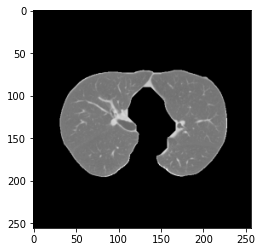

In [ ]:
plt.imshow(trainX[50],cmap = 'gray')
plt.show

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug_train = ImageDataGenerator(rescale= 1.0/255.,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")
aug_test=ImageDataGenerator(rescale=1.0/255)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

classifier_2 = Sequential()

# Step 1 - Convolution
classifier_2.add(Conv2D(32, (3, 3), input_shape = (256, 256, 1), activation = 'relu'))

# Step 2 - Pooling
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier_2.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a third convolutional layer
classifier_2.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a forth convolutional layer
classifier_2.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a forth convolutional layer
classifier_2.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a forth convolutional layer
classifier_2.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier_2.add(Flatten())

# Step 4 - Full connection
classifier_2.add(Dense(units = 512, activation = 'relu'))
#classifier_2.add(Dense(units = 512, activation = 'relu'))
#classifier_2.add(Dense(units = 512, activation = 'relu'))
classifier_2.add(Dense(units = 1, activation = 'sigmoid'))


In [ ]:
from tensorflow.keras.optimizers import SGD,Adam
classifier_2.compile(optimizer = Adam(lr=0.001), loss = 'binary_crossentropy', metrics = ['acc'])
#classifier_2.compile(optimizer = SGD(lr=0.001,momentum=0.9), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
classifier_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)       

In [ ]:
import tensorflow.keras as k

In [ ]:
import time
NAME = "test_6-{}".format(int(time.time()))

In [ ]:
callbacks_1 = [
    #k.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
    k.callbacks.TensorBoard(log_dir='logs\{}'.format(NAME)),
    k.callbacks.ModelCheckpoint('test_model_23.h5', save_best_only=True),
    k.callbacks.ReduceLROnPlateau()]

In [ ]:
steps=trainX.shape[0]//32
steps

41

In [ ]:
hist_sgd = classifier_2.fit(aug_train.flow(trainX, trainY, batch_size=32), steps_per_epoch=steps, epochs = 50, verbose = 1,
                        validation_data = aug_test.flow(valX, valY, batch_size=32), callbacks=callbacks_1)

Epoch 1/50
41/41 [==============================] - 21s 508ms/step - loss: 0.1474 - acc: 0.9444 - val_loss: 0.0774 - val_acc: 0.9730
Epoch 2/50
41/41 [==============================] - 16s 389ms/step - loss: 0.1544 - acc: 0.9405 - val_loss: 0.0750 - val_acc: 0.9595
Epoch 3/50
41/41 [==============================] - 17s 426ms/step - loss: 0.1493 - acc: 0.9444 - val_loss: 0.0647 - val_acc: 0.9662
Epoch 4/50
41/41 [==============================] - 16s 380ms/step - loss: 0.1304 - acc: 0.9467 - val_loss: 0.0503 - val_acc: 0.9865
Epoch 5/50
41/41 [==============================] - 15s 376ms/step - loss: 0.1761 - acc: 0.9235 - val_loss: 0.0886 - val_acc: 0.9527
Epoch 6/50
41/41 [==============================] - 16s 394ms/step - loss: 0.1186 - acc: 0.9573 - val_loss: 0.0544 - val_acc: 0.9662
Epoch 7/50
41/41 [==============================] - 15s 375ms/step - loss: 0.1345 - acc: 0.9444 - val_loss: 0.0802 - val_acc: 0.9797
Epoch 8/50
41/41 [==============================] - 15s 378ms/step - 

Epoch 38/50
41/41 [==============================] - 15s 370ms/step - loss: 0.1113 - acc: 0.9585 - val_loss: 0.0526 - val_acc: 0.9797
Epoch 39/50
41/41 [==============================] - 16s 388ms/step - loss: 0.0942 - acc: 0.9680 - val_loss: 0.0476 - val_acc: 0.9932
Epoch 40/50
41/41 [==============================] - 15s 376ms/step - loss: 0.1116 - acc: 0.9575 - val_loss: 0.0388 - val_acc: 0.9797
Epoch 41/50
41/41 [==============================] - 15s 375ms/step - loss: 0.0841 - acc: 0.9645 - val_loss: 0.0418 - val_acc: 0.9865
Epoch 42/50
41/41 [==============================] - 15s 375ms/step - loss: 0.0933 - acc: 0.9668 - val_loss: 0.0310 - val_acc: 0.9932
Epoch 43/50
41/41 [==============================] - 16s 385ms/step - loss: 0.0926 - acc: 0.9660 - val_loss: 0.0312 - val_acc: 0.9932
Epoch 44/50
41/41 [==============================] - 15s 376ms/step - loss: 0.0869 - acc: 0.9652 - val_loss: 0.0300 - val_acc: 0.9932
Epoch 45/50
41/41 [==============================] - 16s 378ms

In [ ]:
hist_0 = classifier_2.fit(aug_train.flow(trainX, trainY, batch_size=32), steps_per_epoch=steps, epochs = 50, verbose = 1,
                        validation_data = aug_test.flow(valX, valY, batch_size=32), callbacks=callbacks_1)

Epoch 1/50
41/41 [==============================] - 16s 382ms/step - loss: 0.1744 - acc: 0.9289 - val_loss: 0.0763 - val_acc: 0.9730
Epoch 2/50
41/41 [==============================] - 16s 378ms/step - loss: 0.1196 - acc: 0.9474 - val_loss: 0.0530 - val_acc: 0.9797
Epoch 3/50
41/41 [==============================] - 15s 374ms/step - loss: 0.1382 - acc: 0.9505 - val_loss: 0.0746 - val_acc: 0.9662
Epoch 4/50
41/41 [==============================] - 15s 374ms/step - loss: 0.1094 - acc: 0.9544 - val_loss: 0.0691 - val_acc: 0.9730
Epoch 5/50
41/41 [==============================] - 15s 377ms/step - loss: 0.1111 - acc: 0.9536 - val_loss: 0.0614 - val_acc: 0.9662
Epoch 6/50
41/41 [==============================] - 15s 372ms/step - loss: 0.1341 - acc: 0.9490 - val_loss: 0.0716 - val_acc: 0.9730
Epoch 7/50
41/41 [==============================] - 15s 376ms/step - loss: 0.1121 - acc: 0.9552 - val_loss: 0.0264 - val_acc: 1.0000
Epoch 8/50
41/41 [==============================] - 15s 375ms/step - 

Epoch 38/50
41/41 [==============================] - 16s 383ms/step - loss: 0.0429 - acc: 0.9807 - val_loss: 0.0315 - val_acc: 0.9865
Epoch 39/50
41/41 [==============================] - 15s 375ms/step - loss: 0.0385 - acc: 0.9845 - val_loss: 0.0271 - val_acc: 0.9865
Epoch 40/50
41/41 [==============================] - 15s 377ms/step - loss: 0.0349 - acc: 0.9876 - val_loss: 0.0277 - val_acc: 0.9865
Epoch 41/50
41/41 [==============================] - 16s 379ms/step - loss: 0.0304 - acc: 0.9900 - val_loss: 0.0276 - val_acc: 0.9865
Epoch 42/50
41/41 [==============================] - 16s 381ms/step - loss: 0.0472 - acc: 0.9807 - val_loss: 0.0275 - val_acc: 0.9865
Epoch 43/50
41/41 [==============================] - 16s 390ms/step - loss: 0.0291 - acc: 0.9915 - val_loss: 0.0273 - val_acc: 0.9865
Epoch 44/50
41/41 [==============================] - 15s 376ms/step - loss: 0.0312 - acc: 0.9884 - val_loss: 0.0307 - val_acc: 0.9865
Epoch 45/50
41/41 [==============================] - 15s 377ms

## testing using sgd

In [ ]:
import tensorflow
model_2 = tensorflow.keras.models.load_model("test_model_23.h5")
#model_2.summary()
from sklearn.metrics import confusion_matrix,classification_report
y_pred = model_2.predict(testX)
y_pred_nn=[int(p) for p in y_pred]
y_pred_n = np.array(y_pred_nn)
#y_p = np.argmax(y_pred,axis=1)
#y_true = np.argmax(testY)
print('confusion matrix')
print(confusion_matrix(testY,y_pred_n))

confusion matrix
[[112   4]
 [  5  43]]


In [ ]:
y_pred_n,testY

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1

In [ ]:
from sklearn import metrics
sgd_accuracy = metrics.accuracy_score(testY, y_pred_n)
sgd_accuracy 

0.9451219512195121

In [ ]:
sgd_recall_sensitivity = metrics.recall_score(testY, y_pred_n, pos_label=1)
sgd_recall_specificity = metrics.recall_score(testY, y_pred_n, pos_label=0)
sgd_recall_sensitivity, sgd_recall_specificity 

(0.8958333333333334, 0.9655172413793104)

In [ ]:
print('Classification report')
print(classification_report(testY,y_pred_n,target_names=['Non-Cancer','Cancer']))

Classification report
              precision    recall  f1-score   support

  Non-Cancer       0.96      0.97      0.96       116
      Cancer       0.91      0.90      0.91        48

    accuracy                           0.95       164
   macro avg       0.94      0.93      0.93       164
weighted avg       0.94      0.95      0.94       164



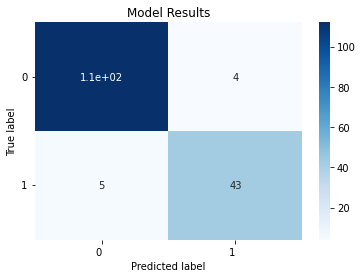

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(confusion_matrix(testY,y_pred_n), annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Model Results')

plt.show()    

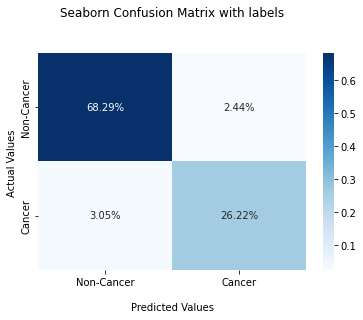

In [ ]:
import seaborn as sns
ax = sns.heatmap(confusion_matrix(testY,y_pred_n)/np.sum(confusion_matrix(testY,y_pred_n)), fmt='.2%', annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Cancer','Cancer'])
ax.yaxis.set_ticklabels(['Non-Cancer','Cancer'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

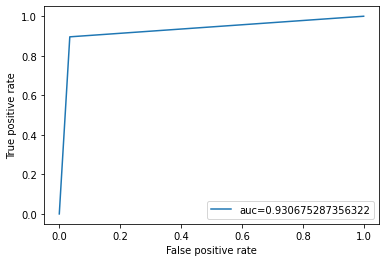

In [ ]:
from sklearn.linear_model import LogisticRegression
model_2 = tensorflow.keras.models.load_model("test_model_23.h5")
y_pred_proba = model_2.predict_proba(testX)
y_pred_nn=[int(p) for p in y_pred_proba]
y_pred_n = np.array(y_pred_nn)
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_n)
auc = metrics.roc_auc_score(testY, y_pred_n)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

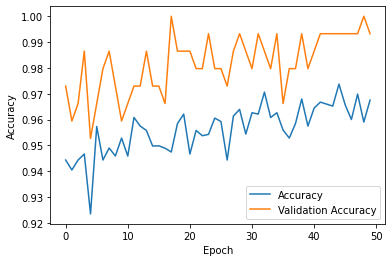

In [ ]:
# print accuracy graph
import matplotlib.pyplot as plt
plt.plot(hist_sgd.history["acc"])
plt.plot(hist_sgd.history['val_acc'])
#plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])

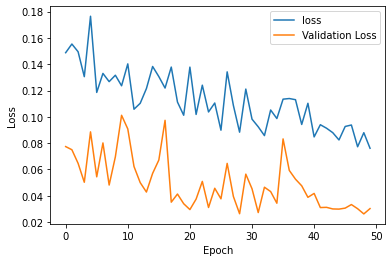

In [ ]:
# print loss graph
plt.plot(hist_sgd.history['loss'])
plt.plot(hist_sgd.history['val_loss'])
#plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])

## testing using adam

In [ ]:
import tensorflow
model = tensorflow.keras.models.load_model("test_model_22.h5")
#model_2.summary()
from sklearn.metrics import confusion_matrix,classification_report
y_pred = model.predict(testX)
y_pred_nn=[int(p) for p in y_pred]
y_pred_n = np.array(y_pred_nn)
#y_p = np.argmax(y_pred,axis=1)
#y_true = np.argmax(testY)
print('confusion matrix')
print(confusion_matrix(testY,y_pred_n))

confusion matrix
[[114   2]
 [  1  47]]


In [ ]:
y_pred_n

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
testY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [ ]:
from sklearn import metrics
adam_accuracy = metrics.accuracy_score(testY, y_pred_n)
adam_accuracy 

0.9817073170731707

In [ ]:
adam_recall_sensitivity = metrics.recall_score(testY, y_pred_n, pos_label=1)
adam_recall_specificity = metrics.recall_score(testY, y_pred_n, pos_label=0)
adam_recall_sensitivity, adam_recall_specificity 

(0.9791666666666666, 0.9827586206896551)

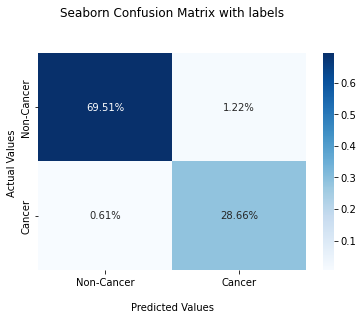

In [ ]:
import seaborn as sns
ax = sns.heatmap(confusion_matrix(testY,y_pred_n)/np.sum(confusion_matrix(testY,y_pred_n)), fmt='.2%', annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Cancer','Cancer'])
ax.yaxis.set_ticklabels(['Non-Cancer','Cancer'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print('Classification report')
print(classification_report(testY,y_pred_n,target_names=['Non-Cancer','Cancer']))

Classification report
              precision    recall  f1-score   support

  Non-Cancer       0.99      0.98      0.99       116
      Cancer       0.96      0.98      0.97        48

    accuracy                           0.98       164
   macro avg       0.98      0.98      0.98       164
weighted avg       0.98      0.98      0.98       164



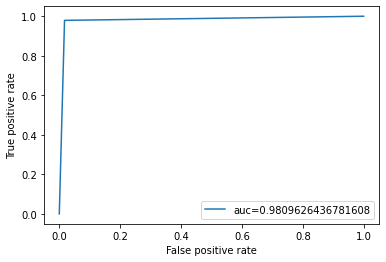

In [ ]:
y_pred_proba = model.predict_proba(testX)
y_pred_nn=[int(p) for p in y_pred_proba]
y_pred_n = np.array(y_pred_nn)
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_n)
auc = metrics.roc_auc_score(testY, y_pred_n)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
layer=model.layers
layer

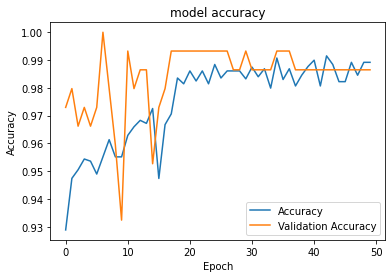

In [ ]:
# print accuracy graph
import matplotlib.pyplot as plt
plt.plot(hist_0.history["acc"])
plt.plot(hist_0.history['val_acc'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])

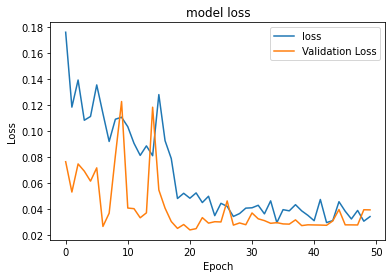

In [ ]:
# print loss graph
plt.plot(hist_0.history['loss'])
plt.plot(hist_0.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])

In [ ]:
import tensorflow
model_new_1 = tensorflow.keras.models.load_model("./test_model_22.h5")

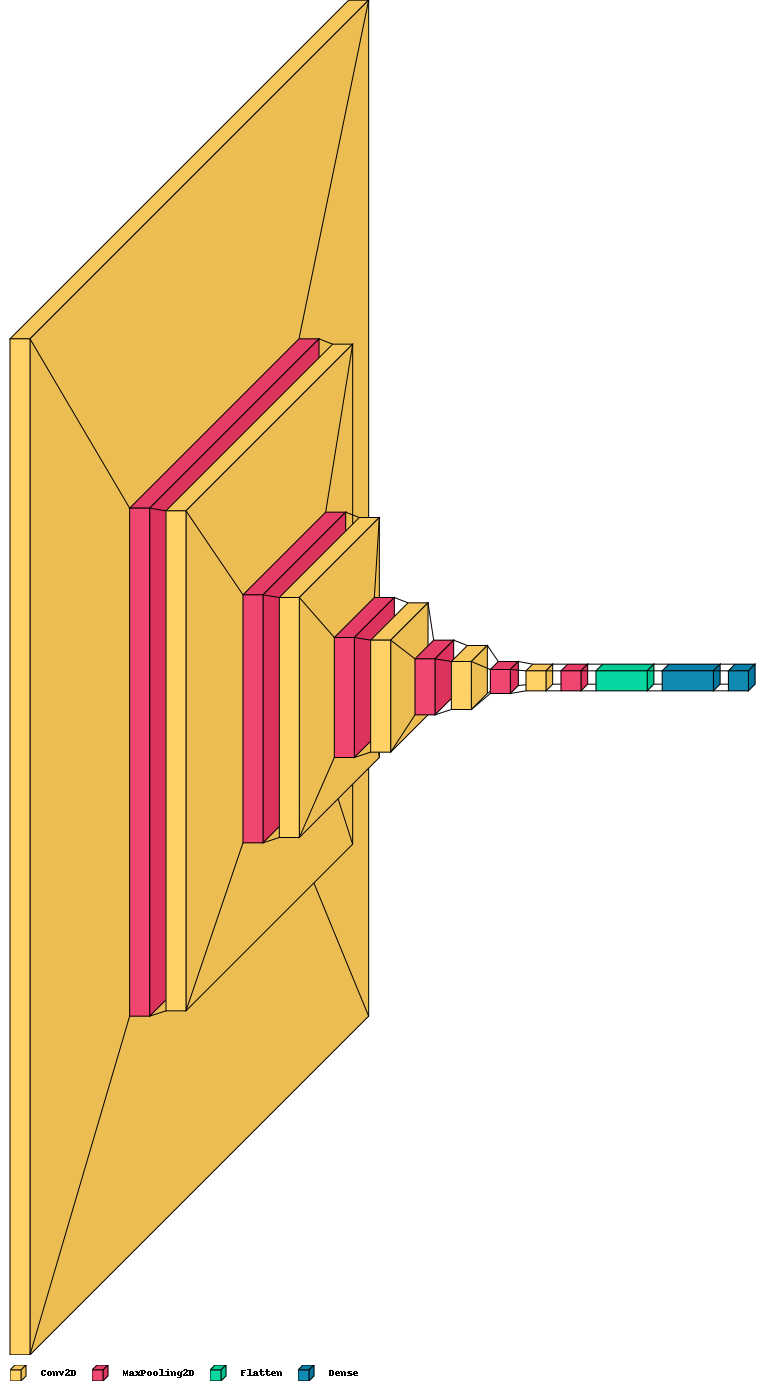

In [ ]:
import visualkeras
from PIL import ImageFont
from collections import defaultdict

#color_map = defaultdict(dict)
 
#color_map[layers.Dense]['fill'] = 'black'
#color_map[layers.Flatten]['fill'] = 'teal'
visualkeras.layered_view(model_new_1,legend=True,spacing=15)

In [ ]:
import tensorflow
model = tensorflow.keras.models.load_model("test_model_22.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
model_json=model.to_json()

In [ ]:
with open("cnn_model.json","w") as file:
    file.write(model_json)

In [ ]:
model.save_weights("cnn_weights.h5")

In [ ]:
y_pred=model.predict(testX)
y_pred=[int(p>0.5) for p in y_pred]
y_pred = np.array(y_pred)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
testY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)